## Handwritten Image Detection with Keras using MNIST data

In this exercise we will work with image data: specifically the famous MNIST data set.  This data set contains 70,000 images of handwritten digits in grayscale (0=black, 255 = white).  The images are 28 pixels by 28 pixels for a total of 784 pixels.  This is quite small by image standards.  Also, the images are well centered and isolated.  This makes this problem solvable with standard fully connected neural nets without too much pre-work.

In the first part of this notebook, we will walk you through loading in the data, building a network, and training it.  Then it will be your turn to try different models and see if you can improve performance

In [5]:
# Preliminaries

import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
%matplotlib inline

2023-03-24 09:26:08.956017: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-24 09:26:09.191137: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


Let's explore the dataset a little bit

In [98]:
# Load the data, shuffled and split between train and test sets (x_train and y_rain)
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [99]:
x_train[0].shape

(28, 28, 1)

In [100]:
# What is the corresponding label in the training set?
y_train[333]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

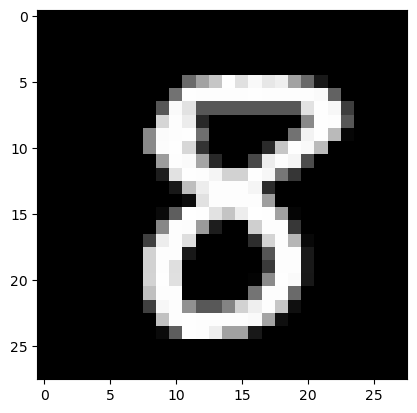

In [101]:
# Let's see what this image actually looks like

plt.imshow(np.squeeze(x_train[333]), cmap='Greys_r')

In [102]:
train_flat = x_train.reshape((len(x_train), -1))
test_flat = x_test.reshape((len(x_test), -1))
train_flat.shape

(60000, 784)

In [7]:
# We will build a model with two hidden layers of size 64
# Fully connected inputs at each layer
# We will use dropout of .2 to help regularize

model = keras.Sequential(
    [
        keras.Input(shape=train_flat.shape[1]),
        layers.Dense(64, activation="relu"),
        layers.Dropout(0.2),
        layers.Dense(64, activation="relu"),
        layers.Dropout(0.2),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


2023-03-23 19:03:00.004093: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
# Let's compile the model
from keras.optimizers import adam_v2
learning_rate = .001
model.compile(loss='categorical_crossentropy',
              optimizer=adam_v2.Adam(learning_rate=learning_rate),
              metrics=['accuracy'])
# note that `categorical cross entropy` is the natural generalization 
# of the loss function we had in binary classification case, to multi class case

In [9]:
# And now let's fit.

batch_size = 128  # mini-batch with 128 examples
# Question: how many batches we have in a single epoch ???
epochs = 20
history = model.fit(
    train_flat, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(test_flat, y_test))

Epoch 1/20
469/469 [==============================] - 2s 3ms/step - loss: 0.5732 - accuracy: 0.8245 - val_loss: 0.1995 - val_accuracy: 0.9395
Epoch 2/20
469/469 [==============================] - 1s 2ms/step - loss: 0.2543 - accuracy: 0.9245 - val_loss: 0.1433 - val_accuracy: 0.9566
Epoch 3/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1998 - accuracy: 0.9406 - val_loss: 0.1265 - val_accuracy: 0.9610
Epoch 4/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1724 - accuracy: 0.9485 - val_loss: 0.1148 - val_accuracy: 0.9644
Epoch 5/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1504 - accuracy: 0.9542 - val_loss: 0.1038 - val_accuracy: 0.9697
Epoch 6/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1405 - accuracy: 0.9572 - val_loss: 0.0970 - val_accuracy: 0.9692
Epoch 7/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1291 - accuracy: 0.9608 - val_loss: 0.1029 - val_accuracy: 0.9712
Epoch 

In [10]:
## We will use Keras evaluate function to evaluate performance on the test set

score = model.evaluate(test_flat, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08565914630889893
Test accuracy: 0.977400004863739


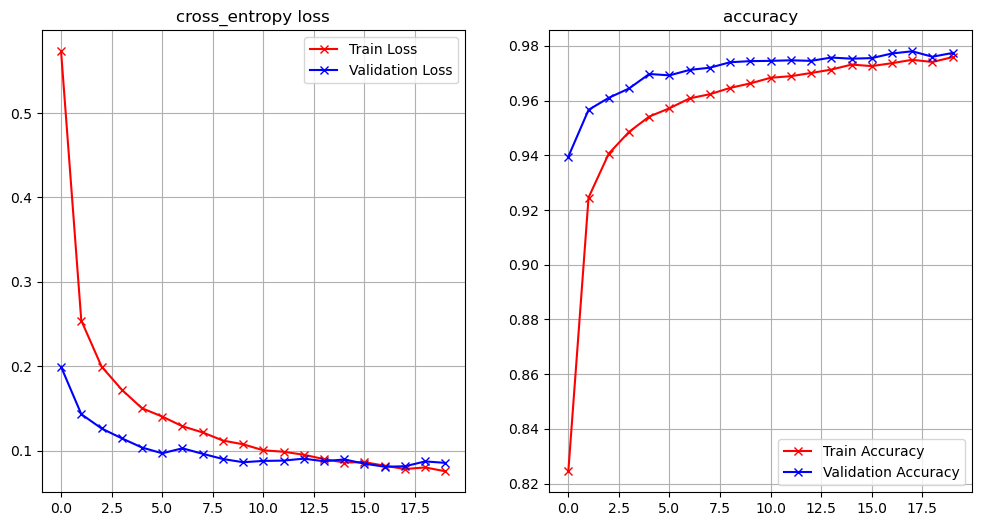

In [11]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    

plot_loss_accuracy(history)

This is reasonably good performance, but we can do even better!  Next you will build an even bigger network and compare the performance.

# Exercises (read book chapter 4.4)

#What happens if you remove dropout? Why?





In [12]:
model = keras.Sequential(
    [
        keras.Input(shape=train_flat.shape[1]),
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                50240     
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss='categorical_crossentropy',
              optimizer=adam_v2.Adam(learning_rate=learning_rate),
                metrics=['accuracy'])
history = model.fit(train_flat, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(test_flat, y_test))

Epoch 1/20
469/469 [==============================] - 1s 2ms/step - loss: 0.3747 - accuracy: 0.8958 - val_loss: 0.1839 - val_accuracy: 0.9446
Epoch 2/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1563 - accuracy: 0.9540 - val_loss: 0.1357 - val_accuracy: 0.9575
Epoch 3/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1159 - accuracy: 0.9650 - val_loss: 0.1156 - val_accuracy: 0.9663
Epoch 4/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0924 - accuracy: 0.9732 - val_loss: 0.0998 - val_accuracy: 0.9689
Epoch 5/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0769 - accuracy: 0.9775 - val_loss: 0.0980 - val_accuracy: 0.9704
Epoch 6/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0654 - accuracy: 0.9799 - val_loss: 0.0920 - val_accuracy: 0.9728
Epoch 7/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0565 - accuracy: 0.9825 - val_loss: 0.0933 - val_accuracy: 0.9729
Epoch 

In [14]:
#evaluate
score = model.evaluate(test_flat, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.11297222971916199
Test accuracy: 0.972599983215332


In [ ]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    

plot_loss_accuracy(history)

Shua-- We see that without the dropouts, the distance between the training set and validation set widens, and the training set loses a lot of its ability to generalize, without the regularization

#Try weight regularizers 
### e.g. tf.keras.regularizers.L2(l2=0.01)


In [17]:
#make a model using tf.keras.reulcatizers.L2(l2=0.01)

model = keras.Sequential(
    [
        keras.Input(shape=train_flat.shape[1]),
        layers.Dense(64, activation="relu", kernel_regularizer=keras.regularizers.L2(l2=0.01)),
        layers.Dense(64, activation="relu", kernel_regularizer=keras.regularizers.L2(l2=0.01)),
        layers.Dense(num_classes, activation="softmax"),
    ]  
)

model.compile(loss='categorical_crossentropy',
                optimizer=adam_v2.Adam(learning_rate=learning_rate),
                metrics=['accuracy'])
history = model.fit(train_flat, y_train,
            batch_size=batch_size,
            epochs=epochs,
            verbose=1,
            validation_data=(test_flat, y_test))
model.summary()

Epoch 1/20
469/469 [==============================] - 1s 2ms/step - loss: 1.0441 - accuracy: 0.8717 - val_loss: 0.6134 - val_accuracy: 0.9179
Epoch 2/20
469/469 [==============================] - 1s 2ms/step - loss: 0.5638 - accuracy: 0.9205 - val_loss: 0.5067 - val_accuracy: 0.9258
Epoch 3/20
469/469 [==============================] - 1s 2ms/step - loss: 0.4918 - accuracy: 0.9295 - val_loss: 0.4697 - val_accuracy: 0.9287
Epoch 4/20
469/469 [==============================] - 1s 2ms/step - loss: 0.4517 - accuracy: 0.9355 - val_loss: 0.4313 - val_accuracy: 0.9395
Epoch 5/20
469/469 [==============================] - 1s 2ms/step - loss: 0.4204 - accuracy: 0.9404 - val_loss: 0.4015 - val_accuracy: 0.9430
Epoch 6/20
469/469 [==============================] - 1s 2ms/step - loss: 0.4002 - accuracy: 0.9428 - val_loss: 0.3874 - val_accuracy: 0.9453
Epoch 7/20
469/469 [==============================] - 1s 2ms/step - loss: 0.3817 - accuracy: 0.9456 - val_loss: 0.3529 - val_accuracy: 0.9515
Epoch 

In [18]:
#evaluate
score = model.evaluate(test_flat, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.25968465209007263
Test accuracy: 0.9646999835968018


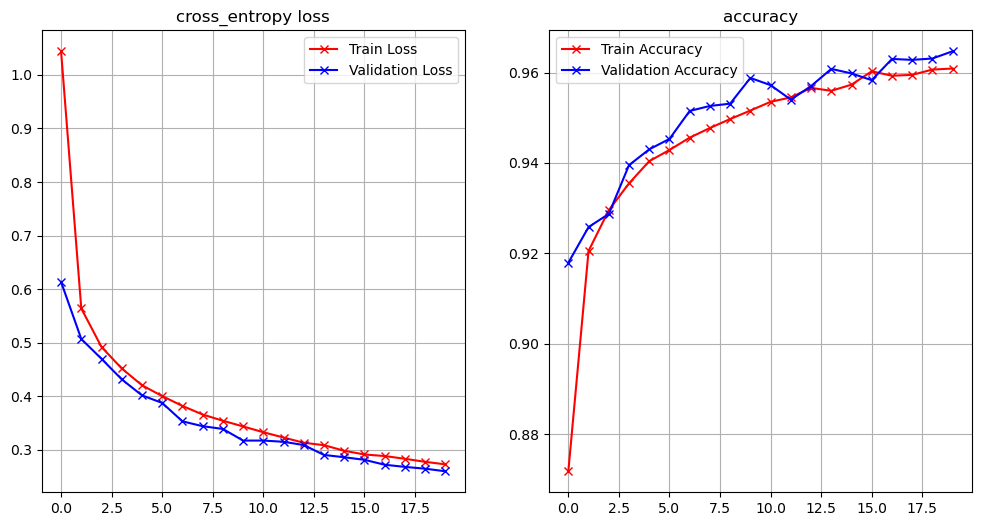

In [19]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    

plot_loss_accuracy(history)

Shua-- The training and validation losses/accuracies are impressively smooth and in tandem with each other (and we can even see that there isn't any leveling out, implying that we could probably even let it train for another couple of epochs without running in to any overfit, and increasing accuracy)

We can even see that at several points in the training process, the evaluation accuracy is even higher than the training set accuracy, indicating great generalization ability.

#Try reducing the network size

### Your Turn: Build your own model
Use the Keras "Sequential" functionality to build `model_2` with the following specifications:

1. Two hidden layers.
2. First hidden layer of size 400 and second of size 300
3. Dropout of .4 at each layer
4. How many parameters does your model have?  How does it compare with the previous model?
4. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128

In [20]:
model_2 = keras.Sequential(
    [
        keras.Input(shape=train_flat.shape[1]),
        layers.Dense(400, activation="relu"),
        layers.Dropout(0.4),
        layers.Dense(300, activation="relu"),
        layers.Dropout(0.4),
        layers.Dense(num_classes, activation="softmax")
    ]
)
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 64)                50240     
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dense_9 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [21]:

model_2.compile(loss='categorical_crossentropy',
                optimizer=keras.optimizers.RMSprop(learning_rate=.001),
                metrics=['accuracy'])

history = model_2.fit(train_flat, y_train,
            batch_size=128,
            epochs=20,
            verbose=1,
            validation_data=(test_flat, y_test))

#evaluate
score = model_2.evaluate(test_flat, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
469/469 [==============================] - 3s 6ms/step - loss: 0.3236 - accuracy: 0.9011 - val_loss: 0.1245 - val_accuracy: 0.9603
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1484 - accuracy: 0.9557 - val_loss: 0.0954 - val_accuracy: 0.9724
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1181 - accuracy: 0.9650 - val_loss: 0.0875 - val_accuracy: 0.9740
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1032 - accuracy: 0.9702 - val_loss: 0.0803 - val_accuracy: 0.9765
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0919 - accuracy: 0.9741 - val_loss: 0.0762 - val_accuracy: 0.9796
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0809 - accuracy: 0.9772 - val_loss: 0.0849 - val_accuracy: 0.9787
Epoch 7/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0794 - accuracy: 0.9786 - val_loss: 0.0781 - val_accuracy: 0.9819
Epoch 

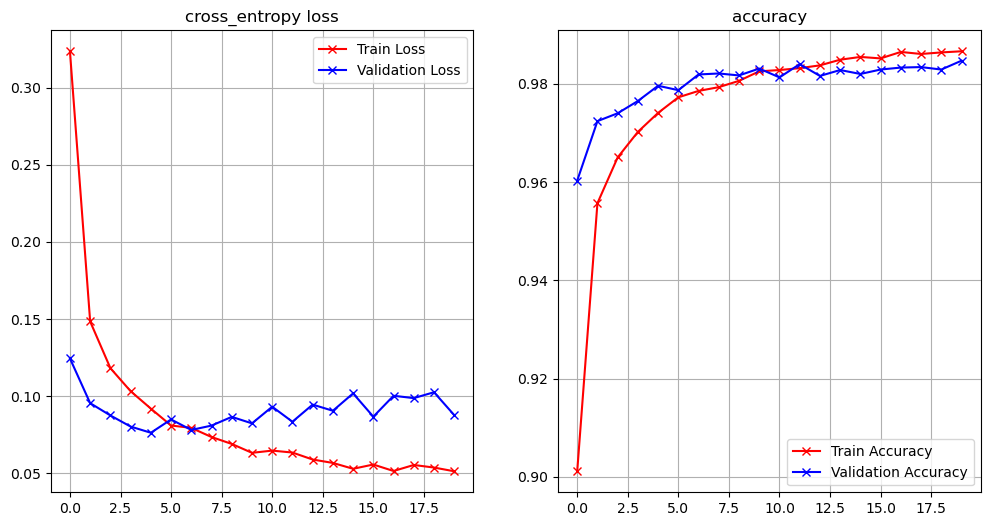

In [22]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    

plot_loss_accuracy(history)

## Think about the following questions

1) How do model_1 and model_2 compare?  Which do you prefer?  If you were going to put one into production, which would you choose and why?

2) Compare the trajectories of the loss function on the training set and test set for each model?  How do they compare?  What does that suggest about each model?  Do the same for accuracy?  Which do you think is more meaningful, the loss or the accuracy?

3) Suggest an improvement to one of the models (changing structure, learning rate, number of epochs, etc.) that you think will result in a better model.  Try it out below?  Did it improve the performance?

In [ ]:
# 1) How do model_1 and model_2 compare?  Which do you prefer?  If you were going to put one into production, which would you choose and why?
### even though model 2 has higher accuracy, model 1 seems to generalize better to the validation set. Therefore, in production settings, I would choose model 1.

#2) Compare the trajectories of the loss function on the training set and test set for each model?  How do they compare?  What does that suggest about each model?  Do the same for accuracy?  Which do you think is more meaningful, the loss or the accuracy?
#### answer: In model 2, the trajectory of the loss function for the training set is sporatic, and not very smooth. However, interestingly, the validation set continues a smooth decrease. Model 1, however, 
# results in smooth losses for both the training set and the validation sets. This could suggest several things, either about the model, or about the datasets. For example, the model could be overfitting to the training set, or the validation set could be too small.

# 3) Suggest an improvement to one of the models (changing structure, learning rate, number of epochs, etc.) that you think will result in a better model.  Try it out below?  Did it improve the performance?
    ## answer: To improve the generalization ability, perhaps we could combine both the L2 regularization, as well as the dropout layers. Lets also try adding another layer

In [33]:
# L2 and dropout
model_3 = keras.Sequential(
    [
        keras.Input(shape=train_flat.shape[1]),
        layers.Dense(256, activation="relu", kernel_regularizer=keras.regularizers.L2(l2=0.001)),
        layers.Dense(256, activation="relu", kernel_regularizer=keras.regularizers.L2(l2=0.001)),
        layers.Dropout(0.3),
        layers.Dense(256, activation="relu", kernel_regularizer=keras.regularizers.L2(l2=0.001)),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation="softmax")
    ]
)

In [34]:
model_3.compile(
    loss="categorical_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=.001), metrics=["accuracy"]
)
history = model_3.fit(
    train_flat, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(test_flat, y_test)
)

Epoch 1/20
469/469 [==============================] - 2s 4ms/step - loss: 0.8069 - accuracy: 0.9017 - val_loss: 0.4510 - val_accuracy: 0.9616
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3861 - accuracy: 0.9591 - val_loss: 0.2878 - val_accuracy: 0.9704
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2814 - accuracy: 0.9668 - val_loss: 0.2390 - val_accuracy: 0.9729
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2405 - accuracy: 0.9703 - val_loss: 0.2267 - val_accuracy: 0.9714
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2213 - accuracy: 0.9729 - val_loss: 0.2157 - val_accuracy: 0.9718
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2072 - accuracy: 0.9742 - val_loss: 0.1927 - val_accuracy: 0.9773
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2001 - accuracy: 0.9743 - val_loss: 0.1932 - val_accuracy: 0.9765
Epoch 

Test loss: 0.17312760651111603
Test accuracy: 0.9736999869346619


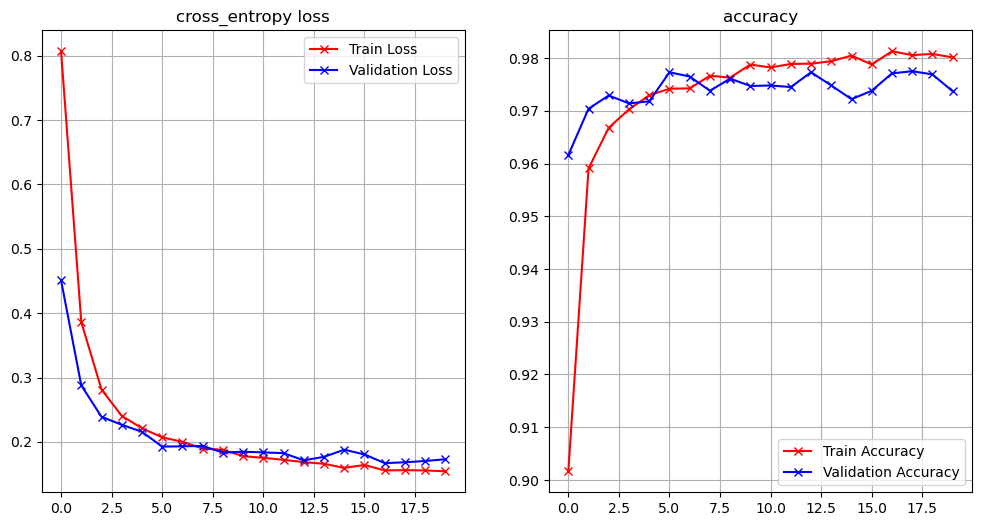

In [35]:
#plot the results
score = model_3.evaluate(test_flat, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plot_loss_accuracy(history)

##CNN
This is better for images.
Next lesson ....

In [41]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout_20 (Dropout)        (None, 1600)            

In [48]:
batch_size = 128
epochs = 10

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 9s 21ms/step - loss: 0.3827 - accuracy: 0.8834 - val_loss: 0.0796 - val_accuracy: 0.9787
Epoch 2/10
422/422 [==============================] - 11s 26ms/step - loss: 0.1106 - accuracy: 0.9656 - val_loss: 0.0564 - val_accuracy: 0.9847
Epoch 3/10
422/422 [==============================] - 10s 24ms/step - loss: 0.0827 - accuracy: 0.9747 - val_loss: 0.0430 - val_accuracy: 0.9887
Epoch 4/10
422/422 [==============================] - 9s 21ms/step - loss: 0.0675 - accuracy: 0.9794 - val_loss: 0.0440 - val_accuracy: 0.9885
Epoch 5/10
422/422 [==============================] - 10s 23ms/step - loss: 0.0593 - accuracy: 0.9809 - val_loss: 0.0377 - val_accuracy: 0.9892
Epoch 6/10
422/422 [==============================] - 10s 23ms/step - loss: 0.0545 - accuracy: 0.9830 - val_loss: 0.0336 - val_accuracy: 0.9908
Epoch 7/10
422/422 [==============================] - 11s 25ms/step - loss: 0.0501 - accuracy: 0.9851 - val_loss: 0.0336 - val_accuracy: 0

In [25]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.026832031086087227
Test accuracy: 0.9905999898910522


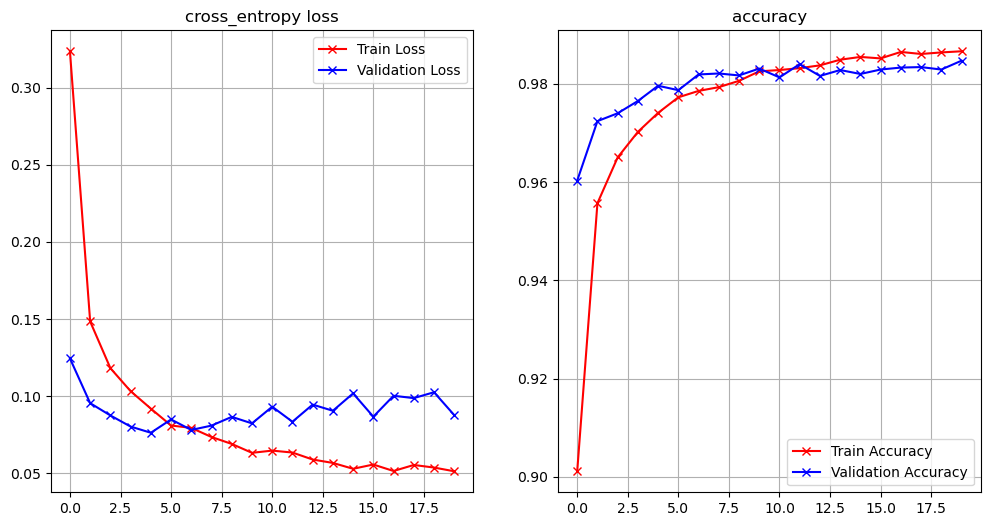

In [26]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    

plot_loss_accuracy(history)

### Shua-- Now In Pytorch

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [6]:
#create pytorch datasets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
#create dataloaders
train_dataset = torch.utils.data.TensorDataset(torch.from_numpy(x_train), torch.from_numpy(y_train))
test_dataset = torch.utils.data.TensorDataset(torch.from_numpy(x_test), torch.from_numpy(y_test))

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=128, shuffle=True)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [88]:
# neural net using nn.Sequential
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 10),
        )
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits


In [90]:
def train_model(model, dataloaders, criterion, optimizer, scheduler, num_epochs=25):

    for epoch in range(num_epochs):
        model.train()
        train_losses = 0.0
        train_accuracy = 0.0
        for inputs, labels in dataloaders['train']:
            inputs= inputs.to(device)
            labels = labels.to(device)
            optimizer.zero_grad()
            with torch.set_grad_enabled(True):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)
                loss.backward() #backpropogation
                optimizer.step()

            accuracy = torch.sum(preds==labels)
            # train_losses+=loss
            train_accuracy+=accuracy
        # scheduler.step()        
        # loss = train_losses/ dataset_sizes['train']
        accuracy = train_accuracy / len(dataloaders['train'].dataset)
        # print(loss)
        print('train_accuracy: ', accuracy)
        model.eval()
        evaluation_loss = 0.0
        evaluation_accuracy = 0.0
        for inputs, labels in dataloaders['val']:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs,1)
            loss = criterion(outputs, labels)

            accuracy = torch.sum(preds==labels)
            evaluation_accuracy+=accuracy

        accuracy = evaluation_accuracy / len(dataloaders['val'].dataset)

        print('eval_accuracy: ', accuracy)

In [95]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = NeuralNetwork().to(device) 

print(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
#loss_fn for MNIST dataset
criterion = nn.CrossEntropyLoss()

epochs = 10
batch_size = 128

dataloaders = {
    'train': train_loader,
    'val': test_loader
}
dataset_sizes=dict()

dataset_sizes['train']= len(dataloaders['train'])
dataset_sizes['val']= len(dataloaders['val'])
from torch.optim import lr_scheduler

scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

model = train_model(model, 
                    dataloaders,
                       criterion, 
                       optimizer, 
                       scheduler,
                       num_epochs=epochs)


cpu
train_accuracy:  tensor(0.6306)
eval_accuracy:  tensor(0.8741)
train_accuracy:  tensor(0.8354)
eval_accuracy:  tensor(0.9026)
train_accuracy:  tensor(0.8727)
eval_accuracy:  tensor(0.9119)
train_accuracy:  tensor(0.8901)
eval_accuracy:  tensor(0.9183)
train_accuracy:  tensor(0.9009)
eval_accuracy:  tensor(0.9259)
train_accuracy:  tensor(0.9118)
eval_accuracy:  tensor(0.9334)
train_accuracy:  tensor(0.9187)
eval_accuracy:  tensor(0.9379)
train_accuracy:  tensor(0.9247)
eval_accuracy:  tensor(0.9420)
train_accuracy:  tensor(0.9291)
eval_accuracy:  tensor(0.9456)
train_accuracy:  tensor(0.9335)
eval_accuracy:  tensor(0.9488)
train_accuracy:  tensor(0.9382)
eval_accuracy:  tensor(0.9520)
train_accuracy:  tensor(0.9398)
eval_accuracy:  tensor(0.9539)
train_accuracy:  tensor(0.9445)
eval_accuracy:  tensor(0.9561)
train_accuracy:  tensor(0.9461)
eval_accuracy:  tensor(0.9569)
train_accuracy:  tensor(0.9475)
eval_accuracy:  tensor(0.9591)
train_accuracy:  tensor(0.9510)
eval_accuracy:  ten